In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
movie_df = pd.read_csv("./movie.csv")

In [3]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [ ]:
# we can see that the dataset has numerical and categorical features with some missing values as well. The target feature is
# imdb_score which is a continous variable whcih makes this a Regression task under Supervised Machine Learning.

In [4]:
movie_df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


## working on numerical and categorical data

In [5]:
categorical_feat = movie_df.select_dtypes(exclude = ['float64','int64'])
numerical_feat = movie_df.select_dtypes(include = ['float64','int64'])
# label = numerical_feat["imdb_score"]
# numerical_feat = numerical_feat.drop(['imdb_score'], axis = 1)

In [6]:
categorical_feat.head()

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
0,Color,James Cameron,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,Wes Studi,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,PG-13
1,Color,Gore Verbinski,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,PG-13
2,Color,Sam Mendes,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,Spectre,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,PG-13
3,Color,Christopher Nolan,Christian Bale,Action|Thriller,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,English,USA,PG-13
4,NaN,Doug Walker,Rob Walker,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN


In [7]:
label

NameError: name 'label' is not defined

In [8]:
numerical_feat.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,NaN,131.0,NaN,131.0,NaN,8,143,0.0,NaN,NaN,NaN,12.0,7.1,NaN,0


C:\Users\heman\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E6BC8B0908>,
      dtype=object)

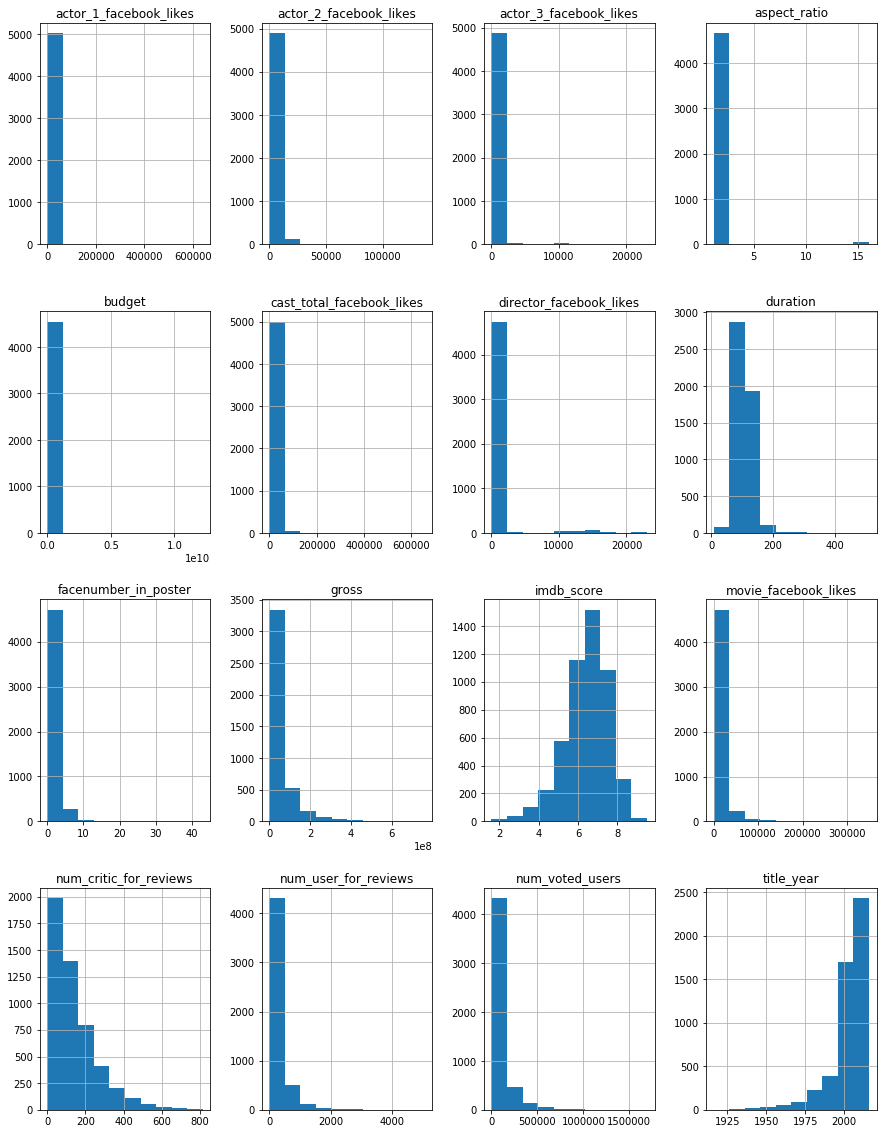

In [9]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
numerical_feat.hist(ax = ax)

In [ ]:
# The numerical features are not scaled properly also some of the features have skewness for eg: num_critic_for_reviews is right skewed
# where as title_year is left skewed
# To get more information about the data we'll plot a Heat map for the correlation

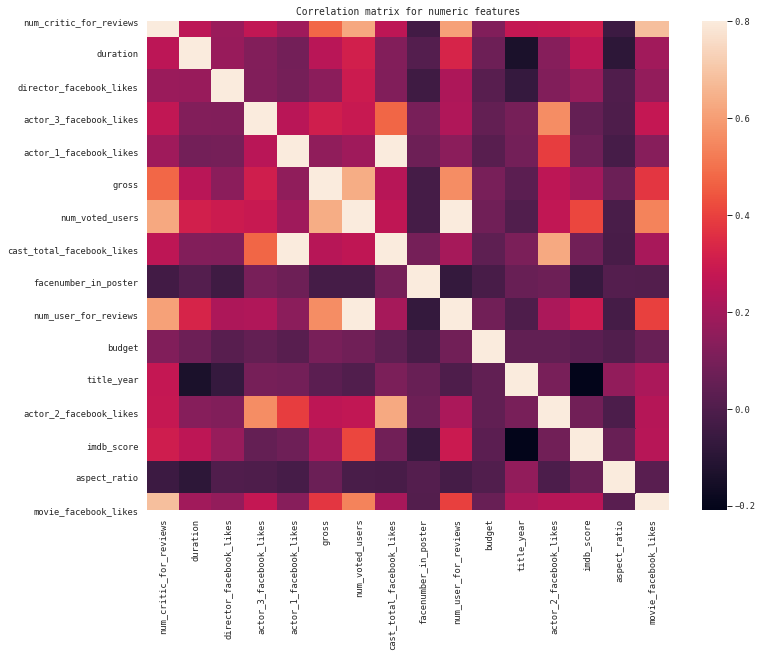

In [10]:
def corrmap(features, title):
    sns.set(context="paper", font="monospace")
    corrmat = movie_df[features].corr()
    f, ax = plt.subplots(figsize=(12, 9))
    plt.title(title)
    sns.heatmap(corrmat, vmax=.8, square=True)
corrmap(numerical_feat.columns,"Correlation matrix for numeric features")

In [ ]:
# Working as per the heat map we can see that the features actor_1_facebook_likes and cast_total_facebook_likes are highly correlated and same goes with num_user_for reviews and num_voted_users.
# We can drop either of the two features to avoid the multicolinearilty effect.
# Furthermore we can neglect those features which are not correlated with our target feature imdb_score
# features which we will drop are : facenumber_in_poster, title_year, actor_3_facebook_likes, actor_1_facebook_likes, actor_2_facebook_likes, aspect_ratio, budget, cast_total_facebook_likes

In [11]:
numerical_feat = numerical_feat.drop(['facenumber_in_poster','title_year', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'aspect_ratio', 'budget', 'cast_total_facebook_likes'],axis =1)

In [12]:
label = numerical_feat['imdb_score']
numerical_feat.drop(['imdb_score'],axis = 1,inplace = True)

## Categorical feature EDA

In [13]:
categorical_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 12 columns):
color              5024 non-null object
director_name      4939 non-null object
actor_2_name       5030 non-null object
genres             5043 non-null object
actor_1_name       5036 non-null object
movie_title        5043 non-null object
actor_3_name       5020 non-null object
plot_keywords      4890 non-null object
movie_imdb_link    5043 non-null object
language           5031 non-null object
country            5038 non-null object
content_rating     4740 non-null object
dtypes: object(12)
memory usage: 472.9+ KB


In [14]:
for i in categorical_feat.columns:
    print(movie_df[i].value_counts())

Color               4815
 Black and White     209
Name: color, dtype: int64
Steven Spielberg     26
Woody Allen          22
Clint Eastwood       20
Martin Scorsese      20
Ridley Scott         17
                     ..
Gary Rogers           1
Michael Roemer        1
Bobcat Goldthwait     1
Patrice Leconte       1
Leslye Headland       1
Name: director_name, Length: 2398, dtype: int64
Morgan Freeman     20
Charlize Theron    15
Brad Pitt          14
Meryl Streep       11
James Franco       11
                   ..
Dylan Moran         1
Alex Borstein       1
Pierre Prieur       1
Erin O'Brien        1
Currie Graham       1
Name: actor_2_name, Length: 3032, dtype: int64
Drama                                  236
Comedy                                 209
Comedy|Drama                           191
Comedy|Drama|Romance                   187
Comedy|Romance                         158
                                      ... 
Comedy|Crime|Sport                       1
Animation|Comedy|Crime

In [ ]:
# As we can see that the features have several distinct values encoding these variables will create many columns which is not
# good for many Machine Learning algorithms. Hence we have to perform some data transformations here. 

### 1) Genres is an interesting feature given different genre type we can divide a movie and assign it those genres as dummy variables.
### 2) Features like movie_title, actor_3_name, plot_keywords, movie_imdb_link dont provide any relevant information about amovie's imdb hence we'll drop them.
### 3) We can perform label encoding on the color feature and hash rest of the columns to 5 columns or any other number to avoid collisions.
### 4) actor_1_name and director_name are relevant to imdb_score but the distinct values are high hence hashing them will make reletavely high number of columns. So, lets drop them for now and move ahead.

In [15]:
categorical_feat = categorical_feat.drop(['movie_imdb_link','actor_2_name','actor_3_name','plot_keywords','movie_title'], axis = 1)

In [16]:
categorical_feat.columns

Index(['color', 'director_name', 'genres', 'actor_1_name', 'language',
       'country', 'content_rating'],
      dtype='object')

In [17]:
# Join the data
new_movie = pd.concat([categorical_feat,numerical_feat], axis =1)

## Train test split

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_movie, label, test_size=0.2, random_state=42)

In [19]:
## Numerical Data transformation
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import FeatureHasher

class Numerical_Attributes(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self,numerical):
        df = pd.DataFrame(numerical)
        return df
class Categorical_Attributes(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def hash1(self,df):
        h = FeatureHasher(n_features = 5, input_type ='string')
        l = list(df.columns)
        hashed_df1 = pd.DataFrame()
        for i in list(df.columns):
            hashed_Feature = h.fit_transform(df[i])
            hashed_Feature = hashed_Feature.toarray() 
            hashed_df = pd.DataFrame(hashed_Feature)
            for j in list(hashed_df.columns):
                hashed_df.rename(columns = {j:i+'_'+str(j)}, inplace = True)
            hashed_df1 = pd.concat([hashed_df1, hashed_df], axis = 1)
        return hashed_df1
    
    def genre(self,df):
        col_names =  ['Action', 'Sport', 'Music', 'Film-Noir', 'Thriller', 'War', 'History', 'Animation', 'Game-Show',
                      'Documentary', 'Fantasy', 'Horror', 'Short', 'Crime', 'Reality-TV', 'Sci-Fi', 'Mystery', 'Romance',
                      'Drama', 'Comedy', 'News', 'Adventure', 'Biography', 'Musical', 'Family', 'Western']
        my_df  = pd.DataFrame(columns = col_names)
        for ind in df.index:
            x = df['genres'][ind].split('|')
            for i in x:
                my_df.at[ind,i] = 1
        my_df = my_df.fillna(value = 0)
        return my_df
    
    def transform(self,categorical):
        
        categorical = categorical.apply(lambda x: x.fillna(x.value_counts().index[0]))
        a = self.genre(categorical)
        cat_con = pd.concat([a, categorical], axis=1)
        
        cat_con = cat_con.drop(["genres"],axis = 1)
        labelencoder = LabelEncoder()
        cat_con['color_encoded'] = labelencoder.fit_transform(cat_con['color'])
        df_clean = cat_con.drop(["color"],axis = 1)
        
        x = df_clean[['language', 'country','content_rating','actor_1_name','director_name']].copy()
        u = self.hash1(x)
        df_clean = df_clean.drop(df_clean.select_dtypes(include= ["object"]),axis =1)
        df_clean.reset_index(drop=True, inplace=True)
        u.reset_index(drop=True, inplace=True)
        final = pd.concat([df_clean,u], axis=1)
        return final
    
num_pipeline = Pipeline([
        ('imputer', KNNImputer(n_neighbors=3)),
        ('std_scaler', StandardScaler()),
        ('transform',Numerical_Attributes())
    ])


def final_transform(df):
    categorical = df.select_dtypes(exclude = ['float64','int64'])
    numerical = df.select_dtypes(include = ['float64','int64'])
    
    num_tr = num_pipeline.fit_transform(numerical)
    cat_attr = Categorical_Attributes()
    cat_tr = cat_attr.transform(df[list(categorical.columns)])
    
    return pd.concat([num_tr,cat_tr],axis=1)

train_tr = final_transform(X_train)
test_tr = final_transform(X_test)


# Feature Selection

Feature 0: 6.896165
Feature 1: 5.425615
Feature 2: 3.544934
Feature 3: 5.050907
Feature 4: 32.665982
Feature 5: 11.640230
Feature 6: 7.028107
Feature 7: 1.959658
Feature 8: 0.848711
Feature 9: 0.978158
Feature 10: 0.720634
Feature 11: 1.662230
Feature 12: 1.482243
Feature 13: 1.550393
Feature 14: 1.189995
Feature 15: 18.064262
Feature 16: 2.050832
Feature 17: 1.158377
Feature 18: 3.076281
Feature 19: 0.420188
Feature 20: 1.208188
Feature 21: 18.064262
Feature 22: 1.265652
Feature 23: 0.721779
Feature 24: 1.010486
Feature 25: 6.546044
Feature 26: 3.165906
Feature 27: 0.617939
Feature 28: 1.103842
Feature 29: 2.590457
Feature 30: 1.199052
Feature 31: 1.549185
Feature 32: 0.673145
Feature 33: 2.852623
Feature 34: 2.193324
Feature 35: 1.159039
Feature 36: 1.604347
Feature 37: 0.718158
Feature 38: 2.221764
Feature 39: 0.881418
Feature 40: 0.971861
Feature 41: 1.234557
Feature 42: 1.874912
Feature 43: 0.597637
Feature 44: 1.199334
Feature 45: 1.185426
Feature 46: 1.640836
Feature 47: 1.40692

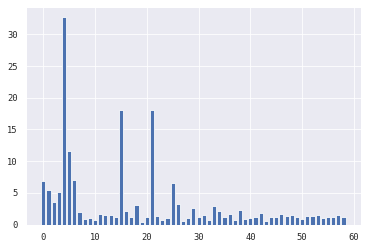

In [20]:
# feature selection
from matplotlib import pyplot
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
def select_features(X_train, y_train):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    return X_train_fs, fs

numerical_feat_fs, fs = select_features(train_tr, y_train)
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [21]:
feature_names = list(train_tr.columns)
mask = fs.get_support() #list of booleans
new_features = [] # The list of K best features

for bool, feature in zip(mask, feature_names):
    if bool:
        new_features.append(feature)
# Filtering all the features whose score is less than 1
myDict = {k: v for k, v in zip(new_features, fs.scores_)  if v > 2}
print(myDict)

{0: 6.89616509657987, 1: 5.425615124661779, 2: 3.544934484037614, 3: 5.050907290911795, 4: 32.66598232813854, 5: 11.6402303108952, 6: 7.028107387651907, 'Game-Show': 18.06426199224401, 'Documentary': 2.050832479274514, 'Horror': 3.0762806126874938, 'Reality-TV': 18.06426199224401, 'Drama': 6.546043640969632, 'Comedy': 3.1659062657507455, 'Biography': 2.5904565444365018, 'color_encoded': 2.8526231223383633, 'language_0': 2.193324436316941, 'language_4': 2.221763660498741}


In [22]:
final_train = train_tr[list(myDict.keys())]
final_test = test_tr[list(myDict.keys())]

# Model Training

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
regressors = [
    LinearRegression(),
    Lasso(alpha=.5),
    Ridge(alpha=.1),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    XGBRegressor()
]
for i in regressors:
    k = i
    k.fit(train_tr, y_train)
    predictions = k.predict(train_tr)
    lin_mse = mean_squared_error(y_train, predictions)
    lin_rmse = np.sqrt(lin_mse)
    print(i.__class__.__name__)
    print(lin_rmse)

LinearRegression
0.8473318807917953
Lasso
1.1133580499839029
Ridge
0.8473246055560296
DecisionTreeRegressor
8.733022385132493e-17
RandomForestRegressor
0.2860950468037712
GradientBoostingRegressor
0.6901591089855194
XGBRegressor
0.26077840382589723


In [27]:
import xgboost

### Random Forest was performing best among all these regressors

In [30]:
# Fine-Tune model using Grid search CV
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
forest_reg = XGBRegressor()

grid_search = GridSearchCV(forest_reg, parameters, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True, verbose = 2)

grid_search.fit(final_train, y_train)


Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=60; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=60; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=60; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=60; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=60; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=140; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=2, n_e

[CV] END ....learning_rate=0.1, max_depth=7, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.1, max_depth=7, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.1, max_depth=7, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.1, max_depth=7, n_estimators=60; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=100; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=100; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=140; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=140; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=140; total time=   0.4s
[CV] END ...learning_rate=0.

[CV] END ...learning_rate=0.01, max_depth=4, n_estimators=60; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=4, n_estimators=60; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=140; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=140; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=140; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=140; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=140; total time=   0.2s
[CV] END ..learning_rate=0.0

[CV] END ...learning_rate=0.01, max_depth=9, n_estimators=60; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=9, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=9, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=9, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=9, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=9, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=9, n_estimators=140; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=9, n_estimators=140; total time=   0.5s
[CV] END ..learning_rate=0.01, max_depth=9, n_estimators=140; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=9, n_estimators=140; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=9, n_estimators=140; total time=   0.7s
[CV] END ..learning_rate=0.01, max_depth=9, n_estimators=180; total time=   0.6s
[CV] END ..learning_rate=0.0

[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=140; total time=   0.4s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=140; total time=   0.3s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=140; total time=   0.4s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=140; total time=   0.3s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=140; total time=   0.3s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=180; total time=   0.4s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=180; total time=   0.4s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=180; total time=   0.4s
[CV] END ..learning_rate=0.0

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [31]:
grid_search.best_params_

{'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 140}

In [32]:
grid_search.best_estimator_

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=140, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)

In [33]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.8428449903150412 {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 60}
0.8237170099250585 {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
0.8155482468025679 {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 140}
0.8102492119323708 {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 180}
0.8159918179906214 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 60}
0.8042989725795476 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.7996654891178908 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 140}
0.7977841115836943 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 180}
0.8043589527913195 {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 60}
0.7949755194433334 {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
0.7945437696819876 {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 140}
0.7953341082687306 {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 180}
0.7972529954422535 {'learning_rate': 0.1, 'max_depth': 

In [35]:
final_model = XGBRegressor()
final_model.fit(train_tr,y_train)
final_predictions = final_model.predict(test_tr)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

0.8827965654416071

In [36]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, final_predictions)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.4310864215579133
